<a href="https://colab.research.google.com/github/elavens/PyMe/blob/main/Forgy%E2%80%99s_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
data = pd.read_excel('/content/drive/MyDrive/read.xlsx')
print(data)

    X   Y
0   3   7
1   2  10
2   2  10
3  15   7
4   2  10
5   3   7


In [7]:
x_values = data['X'].tolist()
y_values = data['Y'].tolist()


X = [[x, y] for x, y in zip(x_values, y_values)]

print('X=' ,X)

X= [[3, 7], [2, 10], [2, 10], [15, 7], [2, 10], [3, 7]]


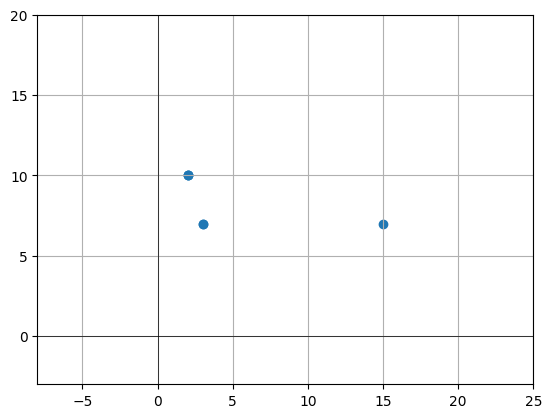

In [9]:
#plotting the datapoint before clustering

x = data['X']
y = data['Y']
plt.scatter(x, y)
plt.grid(True)
plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Display grid lines at every unit
# plt.xticks(range(int(min(x)) - 10, int(max(x)) + 11))
# plt.yticks(range(int(min(y)) - 10, int(max(y)) + 11))

In [10]:
# forgy clustering er main kajgulo ei module a.. implementation of forgy clustring from scratch

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_clustering(data, k):
    # Step 1: Initialize centroids
    centroids = data[:k]

    iteration = 0
    while True:
        iteration += 1
        print(f"Iteration {iteration}")
        print("Current centroids:")
        for centroid in centroids:
            print(centroid)
        print()

        # Step 2: Assign data points to clusters
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Step 3: Calculate new centroids
        new_centroids = []
        for cluster in clusters:
            new_centroid = np.mean(cluster, axis=0)
            new_centroids.append(new_centroid)

        # Step 4: Check if centroids have changed
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    print("Final centroids:")
    for centroid in centroids:
        print(centroid)

    return clusters


data = np.array(X)
k = int(input("Enter the number of cluster(k): "))

clusters = k_means_clustering(data, k)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:")
    for point in cluster:
        print(point)
    print()

Enter the number of cluster(k): 2
Iteration 1
Current centroids:
[3 7]
[ 2 10]

Iteration 2
Current centroids:
[7. 7.]
[ 2. 10.]

Iteration 3
Current centroids:
[15.  7.]
[2.4 8.8]

Final centroids:
[15.  7.]
[2.4 8.8]
Cluster 1:
[15  7]

Cluster 2:
[3 7]
[ 2 10]
[ 2 10]
[ 2 10]
[3 7]

